# Does Obesity causes ventilation dependence in ICU patients?
by ( Reham Rafee)


## Table of Contents
- [Introduction](#intro)
- [Data Assessment](#assess)
- [Data Processing](#process)
- [Data Analysis](#analysis)
- [Survival Analysis](#analysis_s)


<a id='intro'></a>
### Introduction:
   >The dataset about 849 patient admitted to the ICU and we try to see if there is causal inference between the BMI and ventilation dependence.
   > We try to find if the patients' BMI could affect their ventilation duration , lenght of stay in ICU, and extubation success.
  


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm;
import matplotlib.pyplot as plt # library for visualization
import seaborn as sns # library for visualization
sns.set() # this command sets the seaborn chart style as the default

<a id='assess'></a>
# Assessment of the data:

In [2]:
df = pd.read_csv('2 Cleaned obesity ventilation duration (1).csv')
df.head()

,subject_id,stay_id,age,gender,ethnicity,first_careunit,admission_type,sapsii,sapsii_prob,cci,height,weight,bmi,mortality,day_28_mortality,mortality_duration,day_28_extubation,vent_duration,los_icu
0,10025612,32587226,83,M,WHITE,Surgical Intensive Care Unit (SICU),SURGICAL SAME DAY ADMISSION,45,0,6,169,77,27,survive,survive,NaN,Success,0,5
1,10026161,39625056,79,M,WHITE,Medical/Surgical Intensive Care Unit (MICU/SICU),SURGICAL SAME DAY ADMISSION,65,1,9,180,90,28,survive,survive,NaN,Success,4,4
2,10034317,36228864,73,M,WHITE,Trauma SICU (TSICU),SURGICAL SAME DAY ADMISSION,56,1,9,183,89,27,survive,survive,NaN,Success,0,3
3,10062020,35323579,66,F,WHITE,Trauma SICU (TSICU),SURGICAL SAME DAY ADMISSION,45,0,9,169,100,35,survive,survive,NaN,Success,0,1
4,10109085,37504676,69,M,WHITE,Trauma SICU (TSICU),SURGICAL SAME DAY ADMISSION,39,0,9,180,91,28,survive,survive,NaN,Success,0,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   subject_id          849 non-null    int64  
 1   stay_id             849 non-null    int64  
 2   age                 849 non-null    int64  
 3   gender              849 non-null    object 
 4   ethnicity           794 non-null    object 
 5   first_careunit      849 non-null    object 
 6   admission_type      849 non-null    object 
 7   sapsii              849 non-null    int64  
 8   sapsii_prob         849 non-null    int64  
 9   cci                 849 non-null    int64  
 10  height              849 non-null    int64  
 11  weight              849 non-null    int64  
 12  bmi                 849 non-null    int64  
 13  mortality           849 non-null    object 
 14  day_28_mortality    849 non-null    object 
 15  mortality_duration  25 non-null     float64
 16  day_28_e

In [4]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(849, 19)
subject_id              int64
stay_id                 int64
age                     int64
gender                 object
ethnicity              object
first_careunit         object
admission_type         object
sapsii                  int64
sapsii_prob             int64
cci                     int64
height                  int64
weight                  int64
bmi                     int64
mortality              object
day_28_mortality       object
mortality_duration    float64
day_28_extubation      object
vent_duration           int64
los_icu                 int64
dtype: object
   subject_id   stay_id  age gender ethnicity  \
0    10025612  32587226   83      M     WHITE   
1    10026161  39625056   79      M     WHITE   
2    10034317  36228864   73      M     WHITE   
3    10062020  35323579   66      F     WHITE   
4    10109085  37504676   69      M     WHITE   
5    10109956  37631738   62      F       NaN   
6    10115024  39765878   52      F       NaN   
7    10117230 

In [5]:
# descriptive statistics for numeric variables
print(df.describe())

         subject_id       stay_id         age      sapsii  sapsii_prob  \
count  8.490000e+02  8.490000e+02  849.000000  849.000000   849.000000   
mean   1.485063e+07  3.502193e+07   63.542992   36.598351     0.114252   
std    2.882187e+06  2.919078e+06   12.809318   12.621861     0.318305   
min    1.002561e+07  3.000195e+07   22.000000    8.000000     0.000000   
25%    1.246898e+07  3.256432e+07   56.000000   28.000000     0.000000   
50%    1.471896e+07  3.500877e+07   65.000000   35.000000     0.000000   
75%    1.735256e+07  3.762335e+07   72.000000   44.000000     0.000000   
max    1.999944e+07  3.998050e+07   92.000000   91.000000     1.000000   

              cci      height      weight         bmi  mortality_duration  \
count  849.000000  849.000000  849.000000  849.000000           25.000000   
mean     5.760895  168.886926   85.557126   29.957597          109.080000   
std      2.931301    8.432805   23.086422    7.703870          334.539973   
min      0.000000  132.00

In [6]:
# look for duplicates
duplicated_rows = df[df.duplicated()]
duplicated_rows

,subject_id,stay_id,age,gender,ethnicity,first_careunit,admission_type,sapsii,sapsii_prob,cci,height,weight,bmi,mortality,day_28_mortality,mortality_duration,day_28_extubation,vent_duration,los_icu


# Data Exploration

## Univariate Exploration:

### Age:

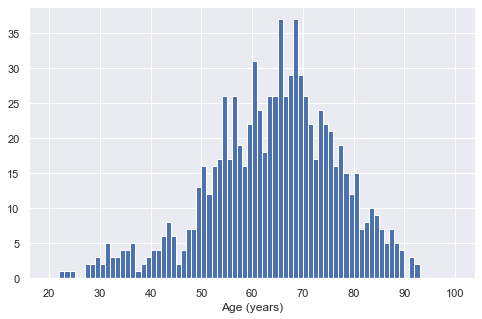

In [7]:
# start with a standard-scaled plot for age
binsize = 1
bins = np.arange(20, 100+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'age', bins = bins)
plt.xlabel('Age (years)')
plt.show()

as shown the age range from early 20th to 90th with nearly normal distribution shape

### Gender:

In [8]:
df_gender = df['gender'].value_counts()
df_gender

M    440
F    409
Name: gender, dtype: int64

### BMI:

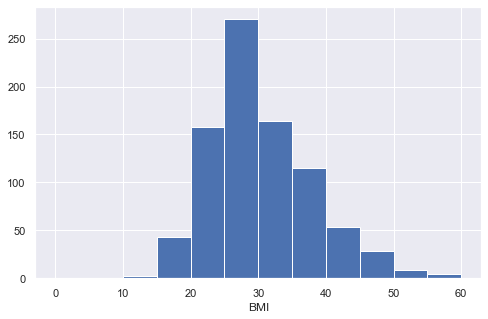

In [9]:
# start with a standard-scaled plot for BMI
binsize = 5
bins = np.arange(0, 60+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'bmi', bins = bins)
plt.xlabel('BMI')
plt.show()

### SAPS II score:

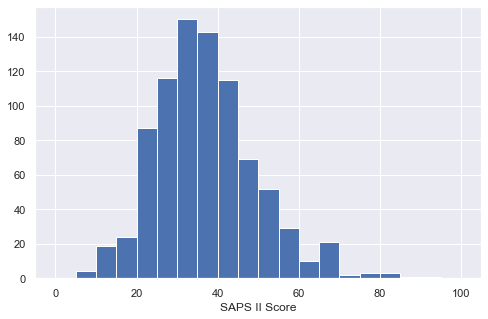

In [10]:
# start with a standard-scaled plot SAPS ii
binsize = 5
bins = np.arange(0, 100+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'sapsii', bins = bins)
plt.xlabel('SAPS II Score')
plt.show()

### CCI Score:

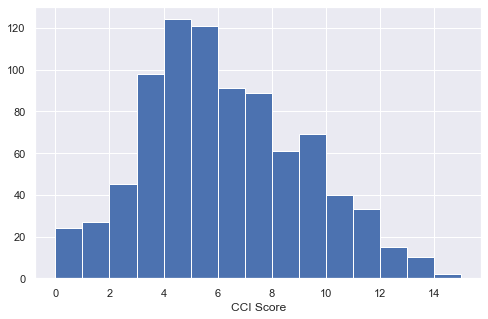

In [11]:
# start with a standard-scaled plot
binsize = 1
bins = np.arange(0, 15+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'cci', bins = bins)
plt.xlabel('CCI Score')
plt.show()

### Length Of Stay in ICU

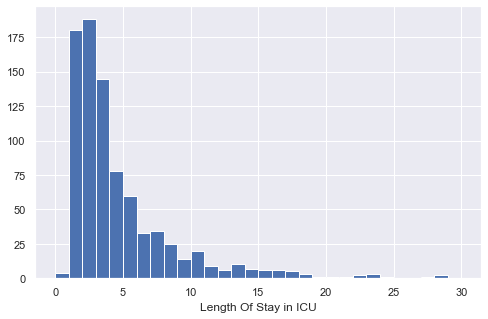

In [91]:
# start with a standard-scaled plot LOS ICU
binsize = 1
bins = np.arange(0, 30+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'los_icu', bins = bins)
plt.xlabel('Length Of Stay in ICU')
plt.show()

* Length of stay in ICU is left skewed as 75% of patients stayed for lees than 5 days in ICU
* their is a couple of outliers we need to deal with.

### Ventilation Duration

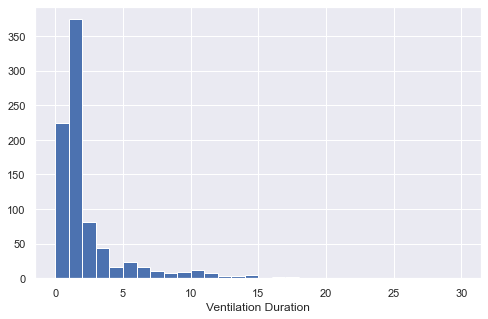

In [13]:
# start with a standard-scaled plot ventilation duration
binsize = 1
bins = np.arange(0,30+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'vent_duration', bins = bins)
plt.xlabel('Ventilation Duration')
plt.show()

* we notice that 25% of patients has 0 ventilation duration which mainly mean we don't now exactly if they never been intubated or their intubation period is un known


### Patients extubated before 28 days

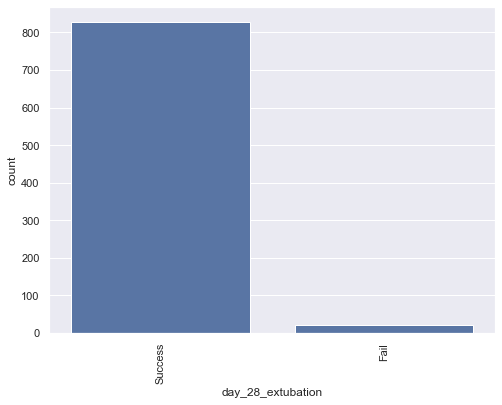

In [14]:
default_color = sns.color_palette()[0]
plt.figure(figsize=[8, 6])
sns.countplot(data = df, x = 'day_28_extubation', color = default_color)
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

* few number of patients fail to be extubated before day 28

### Mortality before 28 days

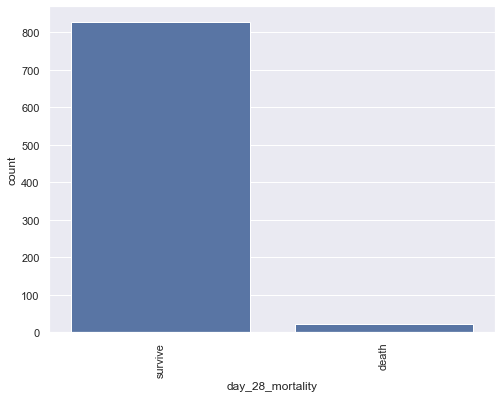

In [15]:
default_color = sns.color_palette()[0]
plt.figure(figsize=[8, 6])
sns.countplot(data = df, x = 'day_28_mortality', color = default_color)
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

In [16]:
numeric_vars = ['vent_duration', 'sapsii', 'cci', 'los_icu', 'age', 'bmi']
categoric_vars = [ 'day_14_extubation', 'day_28_extubation', 'gender', 'day_28_mortality']

<Figure size 2160x1440 with 0 Axes>

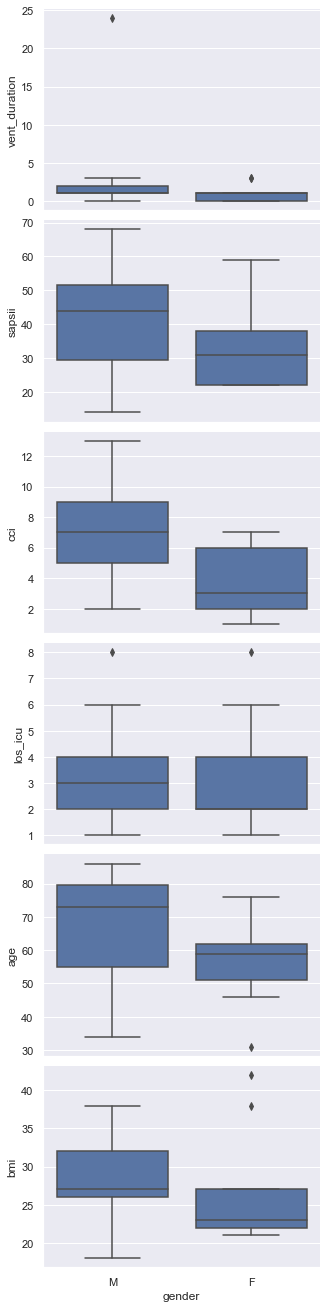

In [17]:
# plot matrix of numeric features against categorical features.

samples = np.random.choice(df.shape[0], 20, replace = False)
data_samp = df.reindex(samples)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [30, 20])
g = sns.PairGrid(data =data_samp, y_vars = numeric_vars , x_vars = ['gender'],
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

* From the box plot between bivariate we notice the following:
- Gender will act as effect modifier within this data set and it is better to stratfy the analysis according to the gender 
- BMI column has an outlier in female patients
- Age column has an outlier in female patients
- LOS ICU column has an outlier in female and male patients
- vent duration column has an outlier in female and male patients

<a id='process'></a>
# Data processing:

In [18]:
# we start with making a copy of the data frame
df_clean = df.copy()

### 1. Create 'day_14_extubation' column 

In [19]:
# create the new column
df_clean['day_14_extubation'] = (df_clean['vent_duration'] <=14) & (df_clean['mortality'] == 'survive')
df.head()

,subject_id,stay_id,age,gender,ethnicity,first_careunit,admission_type,sapsii,sapsii_prob,cci,height,weight,bmi,mortality,day_28_mortality,mortality_duration,day_28_extubation,vent_duration,los_icu
0,10025612,32587226,83,M,WHITE,Surgical Intensive Care Unit (SICU),SURGICAL SAME DAY ADMISSION,45,0,6,169,77,27,survive,survive,NaN,Success,0,5
1,10026161,39625056,79,M,WHITE,Medical/Surgical Intensive Care Unit (MICU/SICU),SURGICAL SAME DAY ADMISSION,65,1,9,180,90,28,survive,survive,NaN,Success,4,4
2,10034317,36228864,73,M,WHITE,Trauma SICU (TSICU),SURGICAL SAME DAY ADMISSION,56,1,9,183,89,27,survive,survive,NaN,Success,0,3
3,10062020,35323579,66,F,WHITE,Trauma SICU (TSICU),SURGICAL SAME DAY ADMISSION,45,0,9,169,100,35,survive,survive,NaN,Success,0,1
4,10109085,37504676,69,M,WHITE,Trauma SICU (TSICU),SURGICAL SAME DAY ADMISSION,39,0,9,180,91,28,survive,survive,NaN,Success,0,5


### 2. Create 'day_14_mortality' column 

In [20]:
# create the new column
df_clean['day_14_mortality'] = (df_clean['vent_duration'] <=14) & (df_clean['mortality'] == 'survive')
df.head()

,subject_id,stay_id,age,gender,ethnicity,first_careunit,admission_type,sapsii,sapsii_prob,cci,height,weight,bmi,mortality,day_28_mortality,mortality_duration,day_28_extubation,vent_duration,los_icu
0,10025612,32587226,83,M,WHITE,Surgical Intensive Care Unit (SICU),SURGICAL SAME DAY ADMISSION,45,0,6,169,77,27,survive,survive,NaN,Success,0,5
1,10026161,39625056,79,M,WHITE,Medical/Surgical Intensive Care Unit (MICU/SICU),SURGICAL SAME DAY ADMISSION,65,1,9,180,90,28,survive,survive,NaN,Success,4,4
2,10034317,36228864,73,M,WHITE,Trauma SICU (TSICU),SURGICAL SAME DAY ADMISSION,56,1,9,183,89,27,survive,survive,NaN,Success,0,3
3,10062020,35323579,66,F,WHITE,Trauma SICU (TSICU),SURGICAL SAME DAY ADMISSION,45,0,9,169,100,35,survive,survive,NaN,Success,0,1
4,10109085,37504676,69,M,WHITE,Trauma SICU (TSICU),SURGICAL SAME DAY ADMISSION,39,0,9,180,91,28,survive,survive,NaN,Success,0,5


### Dealing with outliers:

In [21]:
# dealing with the outliers values in los_icu
q = df_clean['los_icu'].quantile(0.99)
q

23.0

In [22]:
df_clean = df_clean[df_clean['los_icu'] <= q]

In [23]:
#Test
df_clean['los_icu'].max()

23

In [24]:
# dealing with the outliers values in age
q = df_clean['age'].quantile(0.99)
q

88.60000000000002

In [25]:
df_clean = df_clean[df_clean['age'] <= q]
#Test
df_clean['age'].max()

88

In [26]:
# dealing with the outliers values in vent_duration
q = df_clean['vent_duration'].quantile(0.99)
q

14.0

In [27]:
df_clean = df_clean[df_clean['vent_duration'] <= q]
#Test
df_clean['vent_duration'].max()

14

In [28]:
# dealing with the outliers values in bmi
q = df_clean['bmi'].quantile(0.99)
q

53.0

In [29]:
df_clean = df_clean[df_clean['bmi'] <= q]
#Test
df_clean['bmi'].max()

53

In [30]:
#replace True and false to boolean type data ( 0 or 1)
#df['day_14_extubation'].replace({True: 1, False : 0}, inplace = True)
#df['day_14_extubation'] = df['day_14_extubation'].astype('bool')
#df.info()

## 3. Divide the data in BMI  column as follows:
>BMI < 18

>BMI (18-24.9)

>BMI (25-29.9)

>BMI > 30

In [31]:
# dividing the bmi as different ranges
def f(x):
    if (x < 18) :
        return '<18'
    elif (x >= 18) and (x <= 24.9):
        return'18-29.9'
    elif (x >= 25) and (x <= 29.9):
        return'25-29.9'
    elif (x >30):
        return'>30'

In [32]:
df_clean['bmi_range'] = df_clean['bmi'].apply(f)

In [33]:
df_clean.head()

,subject_id,stay_id,age,gender,ethnicity,first_careunit,admission_type,sapsii,sapsii_prob,cci,...,bmi,mortality,day_28_mortality,mortality_duration,day_28_extubation,vent_duration,los_icu,day_14_extubation,day_14_mortality,bmi_range
0,10025612,32587226,83,M,WHITE,Surgical Intensive Care Unit (SICU),SURGICAL SAME DAY ADMISSION,45,0,6,...,27,survive,survive,NaN,Success,0,5,True,True,25-29.9
1,10026161,39625056,79,M,WHITE,Medical/Surgical Intensive Care Unit (MICU/SICU),SURGICAL SAME DAY ADMISSION,65,1,9,...,28,survive,survive,NaN,Success,4,4,True,True,25-29.9
2,10034317,36228864,73,M,WHITE,Trauma SICU (TSICU),SURGICAL SAME DAY ADMISSION,56,1,9,...,27,survive,survive,NaN,Success,0,3,True,True,25-29.9
3,10062020,35323579,66,F,WHITE,Trauma SICU (TSICU),SURGICAL SAME DAY ADMISSION,45,0,9,...,35,survive,survive,NaN,Success,0,1,True,True,>30
4,10109085,37504676,69,M,WHITE,Trauma SICU (TSICU),SURGICAL SAME DAY ADMISSION,39,0,9,...,28,survive,survive,NaN,Success,0,5,True,True,25-29.9


### Divide data according to gender

In [35]:
# For male
df_male = df_clean[df_clean['gender'] == 'M']
print (df_male)

     subject_id   stay_id  age gender               ethnicity  \
0      10025612  32587226   83      M                   WHITE   
1      10026161  39625056   79      M                   WHITE   
2      10034317  36228864   73      M                   WHITE   
4      10109085  37504676   69      M                   WHITE   
9      10135720  33352159   61      M                   ASIAN   
..          ...       ...  ...    ...                     ...   
831    19777866  38405028   71      M  BLACK/AFRICAN AMERICAN   
838    19848285  36670214   54      M                   WHITE   
843    19933276  37624381   62      M                   WHITE   
844    19940062  30415929   50      M         HISPANIC/LATINO   
848    19999442  32336619   44      M                   WHITE   

                                       first_careunit  \
0                 Surgical Intensive Care Unit (SICU)   
1    Medical/Surgical Intensive Care Unit (MICU/SICU)   
2                                 Trauma SICU (T

In [36]:
# For female
df_female = df_clean[df_clean['gender'] == 'F']
print (df_female)

     subject_id   stay_id  age gender        ethnicity  \
3      10062020  35323579   66      F            WHITE   
5      10109956  37631738   62      F              NaN   
6      10115024  39765878   52      F              NaN   
7      10117230  30685878   60      F              NaN   
8      10119001  38415671   88      F            WHITE   
..          ...       ...  ...    ...              ...   
841    19895627  33759673   54      F  HISPANIC/LATINO   
842    19916747  39805150   68      F            WHITE   
845    19990427  34058245   67      F            WHITE   
846    19991135  36533454   60      F            WHITE   
847    19993726  31439824   53      F            WHITE   

                                       first_careunit  \
3                                 Trauma SICU (TSICU)   
5    Medical/Surgical Intensive Care Unit (MICU/SICU)   
6                 Surgical Intensive Care Unit (SICU)   
7                                 Trauma SICU (TSICU)   
8    Medical/Surgi

### Bivariate Exploration:

To start off with, I want to look at the pairwise correlations present between features in the data.

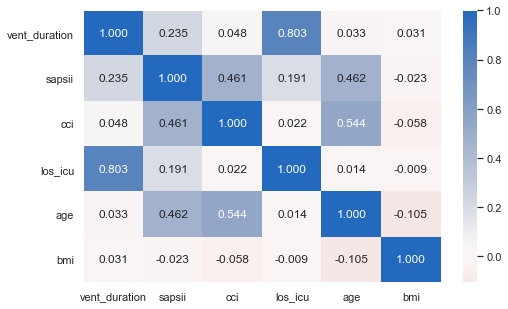

In [38]:
# correlation plot for the whole data
plt.figure(figsize = [8, 5])
sns.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

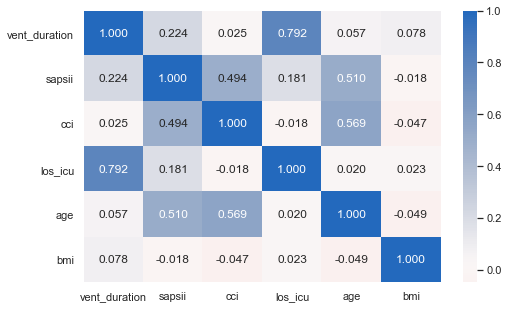

In [39]:
# correlation plot for male data
plt.figure(figsize = [8, 5])
sns.heatmap(df_male[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

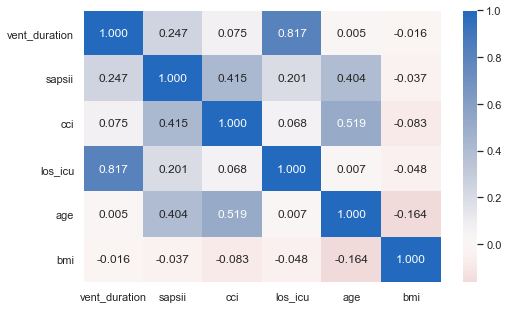

In [40]:
# correlation plot for female data
plt.figure(figsize = [8, 5])
sns.heatmap(df_female[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

when we look at the correlation plot we notice that their is strong correlation between(in descending order):
* LOS and ventilation duration
* CCI score and age
* SAPSII score and age
* SAPSII score and CCI score
we also notice that BMI is not correlated enough to any other variable

<a id='analysis'></a>
## Data Analysis
> here we have three confounders(SAP II  score, Age, CCI score) and one effect modifier (gender), for that we will use  regression models and stratify the analysis for gender.

### we will try to address the following relationships with BMI  :

- [1.BMI relationship with rate of successful extubation before 14 days](#extubation_14)
- [2.BMI relationship with rate of successful extubation before 28 days](#extubation_28)
- [3.BMI relationship with ventilation duration](#ventilation)
- [4.BMI relationship with ICU stay](#ICU)

<a id='extubation_14'></a>
## 1.BMI relationship with rate of successful extubation before 14 days, 28 days and mortality

In [41]:
df_clean['day_14_extubation'].value_counts()

True     796
False     20
Name: day_14_extubation, dtype: int64

In [42]:
df_clean['day_28_mortality'].value_counts()

survive    799
death       17
Name: day_28_mortality, dtype: int64

In [43]:
df_clean['day_28_extubation'].value_counts()

Success    799
Fail        17
Name: day_28_extubation, dtype: int64

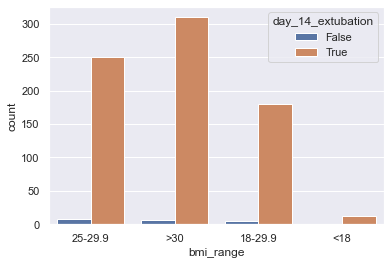

In [44]:
sns.countplot(data = df_clean, x = 'bmi_range', hue = 'day_14_extubation')

as we notice from the plot that this sample of patients almost all of them survive or exceed extubation before day 14 (only 20 patient didn't survive or their extubation failed) , so we can not determine exact correlation between the BMI and successful extubation before 14 days, also can not take equal samples from both classes as we will end with small and unrepresentative samples, and the same applies to extubation before 28 days and mortality.

<a id='ventilation'></a>
## 2.BMI relationship with ventilation duration

### BMI as range:

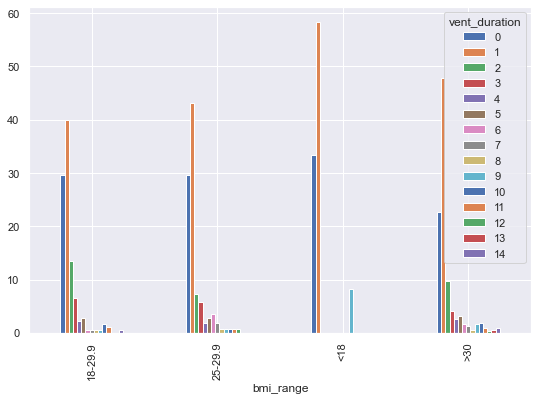

In [79]:
bmi_ranges_vent_duration = df_clean.groupby('bmi_range')['vent_duration'].value_counts(normalize=True).mul(100).round(1)
bmi_ranges_vent_duration.unstack().plot.bar()

>As we see the dominant duration of ventilation in all ranges is from (0-1) days only

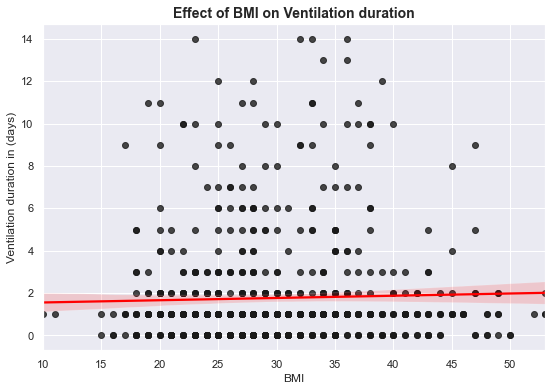

In [45]:
# A regplot accepts x and y in a variety of formats. For the lmplot the data need to be strings in the so called 'long-form'.
#plt.figure(figsize = (10, 8))
sns.set(rc = {'figure.figsize': (9,6)}) # control the size of the figure with the rc dictionary
sns.regplot(x = "bmi", 
            y = "vent_duration", 
            data = df_clean, 
            scatter_kws = {'color': 'k'}, # color for the points
            line_kws = {'color': 'red'}) # color for the regression line
plt.xlabel("BMI")
plt.ylabel("Ventilation duration in (days)")
plt.title("Effect of BMI on Ventilation duration", fontsize = 14, weight = "bold")
plt.show()

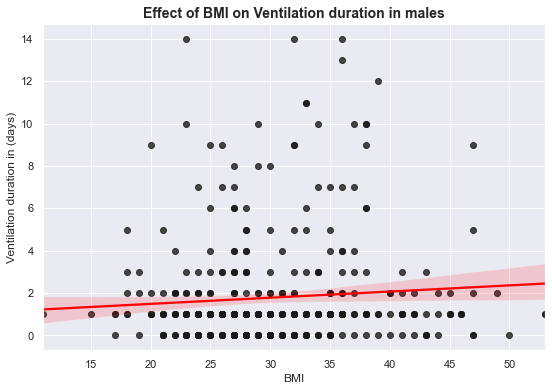

In [46]:
# A regplot accepts x and y in a variety of formats. For the lmplot the data need to be strings in the so called 'long-form'.
#plt.figure(figsize = (10, 8))
sns.set(rc = {'figure.figsize': (9,6)}) # control the size of the figure with the rc dictionary
sns.regplot(x = "bmi", 
            y = "vent_duration", 
            data = df_male, 
            scatter_kws = {'color': 'k'}, # color for the points
            line_kws = {'color': 'red'}) # color for the regression line
plt.xlabel("BMI")
plt.ylabel("Ventilation duration in (days)")
plt.title("Effect of BMI on Ventilation duration in males", fontsize = 14, weight = "bold")
plt.show()

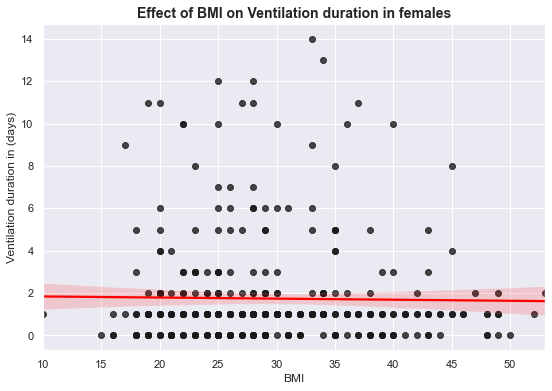

In [47]:
# A regplot accepts x and y in a variety of formats. For the lmplot the data need to be strings in the so called 'long-form'.
#plt.figure(figsize = (10, 8))
sns.set(rc = {'figure.figsize': (9,6)}) # control the size of the figure with the rc dictionary
sns.regplot(x = "bmi", 
            y = "vent_duration", 
            data = df_female, 
            scatter_kws = {'color': 'k'}, # color for the points
            line_kws = {'color': 'red'}) # color for the regression line
plt.xlabel("BMI")
plt.ylabel("Ventilation duration in (days)")
plt.title("Effect of BMI on Ventilation duration in females", fontsize = 14, weight = "bold")
plt.show()

There is weak correlation between BMI and ventilation duration and for further confirmation we will use sprearman's correlation

In [48]:
# calculate spearman's correlation
from scipy.stats import spearmanr
data1 = df_clean['vent_duration']
data2 = df_clean['bmi']
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)


Spearmans correlation coefficient: 0.047
Samples are uncorrelated (fail to reject H0) p=0.182


>The spearman's correlation confirms that the IBM and ventilation duration are not correlated , still because gender is effect modifier will repeat the calculations of spearman's correlation using gender separated data.

In [49]:
# calculate spearman's correlation For male data
from scipy.stats import spearmanr
data1 = df_male['vent_duration']
data2 = df_male['bmi']
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.074
Samples are uncorrelated (fail to reject H0) p=0.127


In [50]:
# calculate spearman's correlation For female data
from scipy.stats import spearmanr
data1 = df_female['vent_duration']
data2 = df_female['bmi']
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.026
Samples are uncorrelated (fail to reject H0) p=0.613


In [61]:
### Multiple linear regression for males vent_duration
import statsmodels.api as sms;
df_male['intercept'] = 1
mlr1 = sms.OLS(df_male['vent_duration'], df_male[['intercept', 'bmi', 'sapsii', 'age','cci' ]])
results_mlr1 = mlr1.fit()
results_mlr1.summary()

<ipython-input-61-1e4d9afe0fdb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['intercept'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          vent_duration   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     7.525
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           7.29e-06
Time:                        13:04:33   Log-Likelihood:                -989.05
No. Observations:                 429   AIC:                             1988.
Df Residuals:                     424   BIC:                             2008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3477      0.819     -0.424      0.672      -1.958       1.263
bmi            0.0287      0.018      1.636      0.103      -0.006       0.063
sapsii         0.0573      0.011      5.062      0.000       0.035       0.080
age           -0.0060      0.012     -0.519      0.604      -0.029       0.017
cci           -0.0798      0.049     -1.614      0.107      -0.177       0.017
==============================================================================
Omnibus:                      239.744   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1300.023
Skew:                           2.496   Prob(JB):                    5.05e-283
Kurtosis:                       9.914   Cond. No.                         562.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
### Multiple linear regression for females vent_duration
import statsmodels.api as sms;
df_female['intercept'] = 1
mlr2 = sms.OLS(df_male['vent_duration'], df_male[['intercept', 'bmi', 'sapsii', 'age','cci' ]])
results_mlr2 = mlr2.fit()
results_mlr2.summary()

<ipython-input-62-e0f4a08ea988>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['intercept'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          vent_duration   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     7.525
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           7.29e-06
Time:                        13:05:26   Log-Likelihood:                -989.05
No. Observations:                 429   AIC:                             1988.
Df Residuals:                     424   BIC:                             2008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3477      0.819     -0.424      0.672      -1.958       1.263
bmi            0.0287      0.018      1.636      0.103      -0.006       0.063
sapsii         0.0573      0.011      5.062      0.000       0.035       0.080
age           -0.0060      0.012     -0.519      0.604      -0.029       0.017
cci           -0.0798      0.049     -1.614      0.107      -0.177       0.017
==============================================================================
Omnibus:                      239.744   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1300.023
Skew:                           2.496   Prob(JB):                    5.05e-283
Kurtosis:                       9.914   Cond. No.                         562.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

and again it confirms that BMI is not correlated with ventilation duration

<a id='ICU'></a>
## 4.BMI relationship with ICU stay

### BMI as ranges

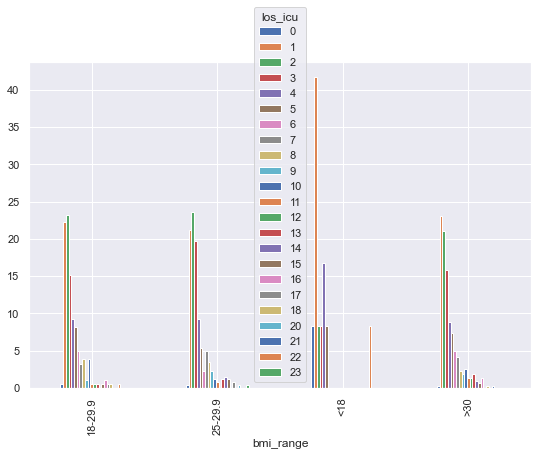

In [80]:
bmi_ranges_los_icu = df_clean.groupby('bmi_range')['los_icu'].value_counts(normalize=True).mul(100).round(1)
bmi_ranges_los_icu.unstack().plot.bar()

>As we see the dominant lenght of stay in all ranges is from (0-5) days only

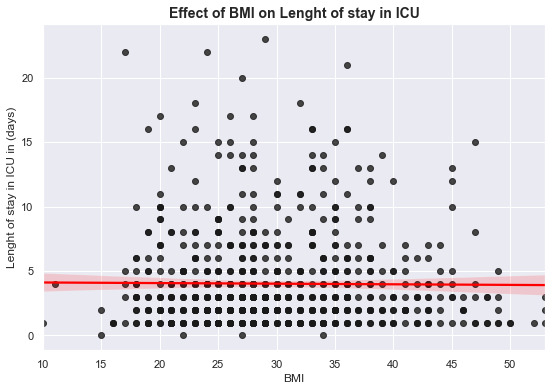

In [51]:
# A regplot accepts x and y in a variety of formats. For the lmplot the data need to be strings in the so called 'long-form'.
#plt.figure(figsize = (10, 8))
sns.set(rc = {'figure.figsize': (9,6)}) # control the size of the figure with the rc dictionary
sns.regplot(x = "bmi", 
            y = "los_icu", 
            data = df_clean, 
            scatter_kws = {'color': 'k'}, # color for the points
            line_kws = {'color': 'red'}) # color for the regression line
plt.xlabel("BMI")
plt.ylabel("Lenght of stay in ICU in (days)")
plt.title("Effect of BMI on Lenght of stay in ICU", fontsize = 14, weight = "bold")
plt.show()

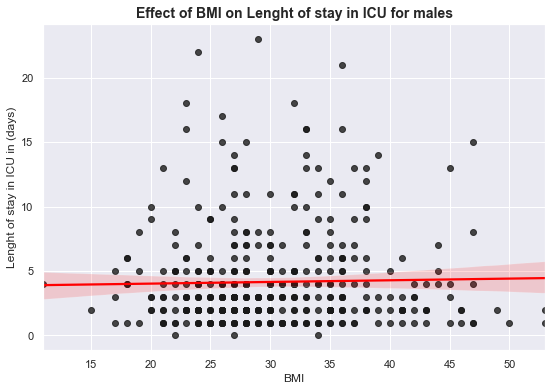

In [52]:
# A regplot accepts x and y in a variety of formats. For the lmplot the data need to be strings in the so called 'long-form'.
#plt.figure(figsize = (10, 8))
sns.set(rc = {'figure.figsize': (9,6)}) # control the size of the figure with the rc dictionary
sns.regplot(x = "bmi", 
            y = "los_icu", 
            data = df_male, 
            scatter_kws = {'color': 'k'}, # color for the points
            line_kws = {'color': 'red'}) # color for the regression line
plt.xlabel("BMI")
plt.ylabel("Lenght of stay in ICU in (days)")
plt.title("Effect of BMI on Lenght of stay in ICU for males", fontsize = 14, weight = "bold")
plt.show()

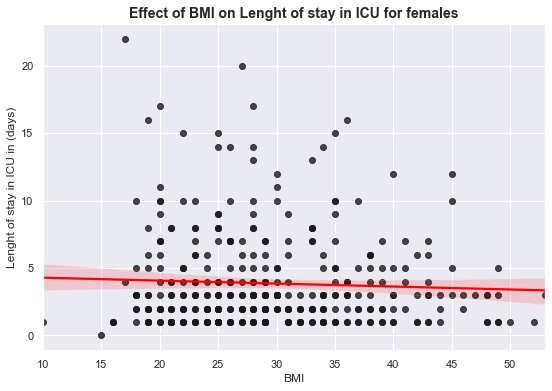

In [53]:
# A regplot accepts x and y in a variety of formats. For the lmplot the data need to be strings in the so called 'long-form'.
#plt.figure(figsize = (10, 8))
sns.set(rc = {'figure.figsize': (9,6)}) # control the size of the figure with the rc dictionary
sns.regplot(x = "bmi", 
            y = "los_icu", 
            data = df_female, 
            scatter_kws = {'color': 'k'}, # color for the points
            line_kws = {'color': 'red'}) # color for the regression line
plt.xlabel("BMI")
plt.ylabel("Lenght of stay in ICU in (days)")
plt.title("Effect of BMI on Lenght of stay in ICU for females", fontsize = 14, weight = "bold")
plt.show()

There is weak correlation between BMI and lenght of stay ICU and for further confirmation we will use sprearman's correlation

In [54]:
# calculate spearman's correlation
from scipy.stats import spearmanr
data1 = df_clean['los_icu']
data2 = df_clean['bmi']
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.015
Samples are uncorrelated (fail to reject H0) p=0.672


>The spearman's correlation confirms that the IBM and lenght os stay in ICU are not correlated , still because gender is effect modifier will repeat the calculations of spearman's correlation using gender separated data.

In [55]:
# calculate spearman's correlation For male
from scipy.stats import spearmanr
data1 = df_male['los_icu']
data2 = df_male['bmi']
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.020
Samples are uncorrelated (fail to reject H0) p=0.677


In [56]:
# calculate spearman's correlation For female
from scipy.stats import spearmanr
data1 = df_female['los_icu']
data2 = df_female['bmi']
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.006
Samples are uncorrelated (fail to reject H0) p=0.900


## Finally, we will build multi linear regression model including the suspected confounders to exclude the possibility of omitted variable bias and stratify the analysis according to gender to avoid its effect modification

In [57]:
### Multiple linear regression for males LOS in ICU
import statsmodels.api as sms;
df_male['intercept'] = 1
mlr = sms.OLS(df_male['los_icu'], df_male[['intercept', 'bmi', 'sapsii', 'age','cci' ]])
results_mlr = mlr.fit()
results_mlr.summary()

<ipython-input-57-7c2e3accc557>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['intercept'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                los_icu   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     5.521
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           0.000243
Time:                        13:03:39   Log-Likelihood:                -1165.6
No. Observations:                 429   AIC:                             2341.
Df Residuals:                     424   BIC:                             2362.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.6150      1.237      2.115      0.035       0.184       5.046
bmi            0.0112      0.027      0.421      0.674      -0.041       0.063
sapsii         0.0785      0.017      4.591      0.000       0.045       0.112
age           -0.0126      0.018     -0.718      0.473      -0.047       0.022
cci           -0.1526      0.075     -2.045      0.041      -0.299      -0.006
==============================================================================
Omnibus:                      191.103   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              734.445
Skew:                           2.040   Prob(JB):                    3.29e-160
Kurtosis:                       7.944   Cond. No.                         562.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
### Multiple linear regression for females LOS in ICU
import statsmodels.api as sms;
df_female['intercept'] = 1
mlr = sms.OLS(df_female['los_icu'], df_female[['intercept', 'bmi', 'sapsii', 'age','cci' ]])
results_mlr = mlr.fit()
results_mlr.summary()

<ipython-input-58-682629d6e03f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['intercept'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                los_icu   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     5.059
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           0.000555
Time:                        13:03:39   Log-Likelihood:                -1024.3
No. Observations:                 387   AIC:                             2059.
Df Residuals:                     382   BIC:                             2078.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.0289      1.279      3.149      0.002       1.513       6.545
bmi           -0.0251      0.023     -1.098      0.273      -0.070       0.020
sapsii         0.0680      0.016      4.126      0.000       0.036       0.100
age           -0.0317      0.018     -1.770      0.077      -0.067       0.004
cci            0.0281      0.076      0.369      0.712      -0.121       0.178
==============================================================================
Omnibus:                      159.099   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              542.332
Skew:                           1.893   Prob(JB):                    1.71e-118
Kurtosis:                       7.393   Cond. No.                         585.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

and again it confirms that BMI is not correlated with LOS in ICU

<a id='analysis_s'></a>
# Time to event ( Survival Analysis)

### Ventilation Duration

In [59]:
df_clean['vent_duration'].value_counts()

1     365
0     221
2      79
3      42
5      23
4      17
6      16
10     12
7      10
9       9
11      7
8       6
14      4
12      3
13      2
Name: vent_duration, dtype: int64

In [81]:
### generating a Kaplan_Maier curve
#### importing the required libaraies
from lifelines import KaplanMeierFitter

In [82]:
#replace success and fail in day_28_ extubation  to boolean type data ( 0 or 1)
df_n= df_clean.copy()
df_n['day_28_mortality'].replace({'Success': 1, 'Fail' : 0}, inplace = True)
df_n['day_28_mortality'] = df_n['day_28_mortality'].astype('bool')
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 848
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   subject_id          816 non-null    int64  
 1   stay_id             816 non-null    int64  
 2   age                 816 non-null    int64  
 3   gender              816 non-null    object 
 4   ethnicity           763 non-null    object 
 5   first_careunit      816 non-null    object 
 6   admission_type      816 non-null    object 
 7   sapsii              816 non-null    int64  
 8   sapsii_prob         816 non-null    int64  
 9   cci                 816 non-null    int64  
 10  height              816 non-null    int64  
 11  weight              816 non-null    int64  
 12  bmi                 816 non-null    int64  
 13  mortality           816 non-null    object 
 14  day_28_mortality    816 non-null    bool   
 15  mortality_duration  20 non-null     float64
 16  day_28_e

Text(0, 0.5, 'est. probability of survival $\\hat{S}(t)$')

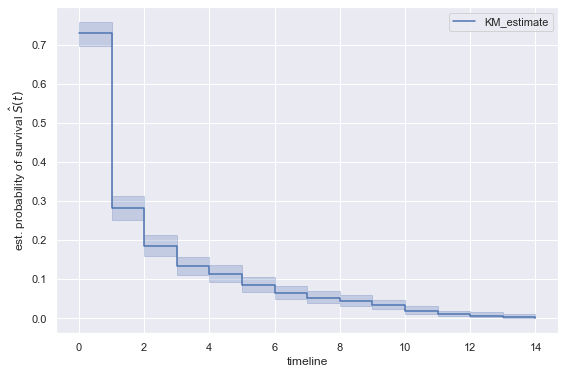

In [83]:
T = df_n['vent_duration']
E = df_n['day_28_mortality']
kmf = KaplanMeierFitter()
kmf.fit(durations = T , event_observed = E)
kmf.plot_survival_function()
plt.ylabel("est. probability of survival $\hat{S}(t)$")

In [84]:
# estimate the median survival time and 95% confidence intervals
from lifelines.utils import median_survival_times

In [85]:
#Print survival probabilities at each day
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.729167
1.0,0.281863
2.0,0.185049
3.0,0.133578
4.0,0.112745
5.0,0.084559
6.0,0.064951
7.0,0.052696
8.0,0.045343


> We can see for the provided sample , the probability of patient survives after 1 day of ventilation drops to 28% from 72% at zero ventilation duration

### Length of stay in ICU

In [86]:
df_clean['los_icu'].value_counts()

2     181
1     178
3     142
4      75
5      59
7      34
6      32
8      24
10     19
9      14
13     10
11      9
14      7
16      6
12      6
15      6
0       4
17      3
18      2
22      2
20      1
21      1
23      1
Name: los_icu, dtype: int64

In [87]:
median = kmf.median_survival_time_
median_confidence_interval = median_survival_times(kmf.confidence_interval_)
print(median)
print(median_confidence_interval)

1.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                     1.0                     1.0


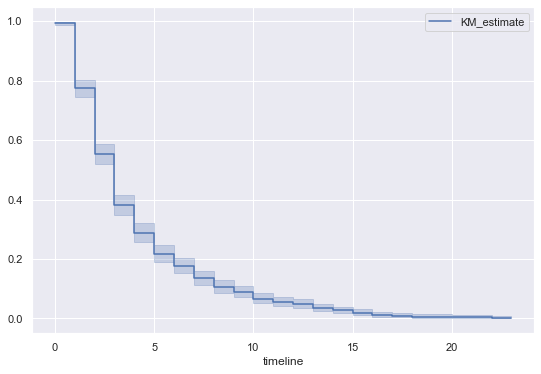

In [88]:
T1 = df_n['los_icu']
E1 = df_n['day_28_mortality']
kmf1 = KaplanMeierFitter()
kmf1.fit(durations = T1 , event_observed = E1)
kmf1.plot_survival_function()

In [89]:
median = kmf1.median_survival_time_
median_confidence_interval = median_survival_times(kmf1.confidence_interval_)
print(median)
print(median_confidence_interval)

3.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                     3.0                     3.0


In [90]:
#Print survival probabilities at each day
kmf1.survival_function_

,KM_estimate
timeline,
0.0,0.995098
1.0,0.776961
2.0,0.555147
3.0,0.381127
4.0,0.289216
5.0,0.216912
6.0,0.177696
7.0,0.136029
8.0,0.106618


> We can see for the provided sample , the probability of patient survives after 2 days of staying in ICU drops to 77% from 55% if the patient stayed only one day